# Clase 2: Ilustración de la Ley Fuerte de los Grandes Números

   Prof. Tito Homem-de-Mello

## Tomaremos como ejemplo 100 lanzamientos de un dado de 6 caras

### Primero, carguemos algunas bibliotecas necesarias

In [ ]:
#install.packages('tidyr')
#install.packages('ggplot2')

In [1]:
library(stats)
library(purrr)
library(tidyr)
library(ggplot2)


Attaching package: ‘purrr’


The following object is masked from ‘package:jsonlite’:

    flatten




### Calculemos medias de $n$ lanzamientos, $n=1,\ldots,100$

In [24]:
mu <- mean(1:6) #Verdadera media
sigma <- sd(1:6) #verdadera desviacion estandar
N <- 100 #Nro. de lanzamientos 
medias <- vector("double",N)  #Inicialización
sN <- vector("double",N) 

u <- rdunif(N,1,6) #Sortea N muestras de una Uniforme(1,2,...6)
medias <- cumsum(u) / 1:N #Calcula media de los primeros n elementos, n=1,...N


### Gráfico de las medias

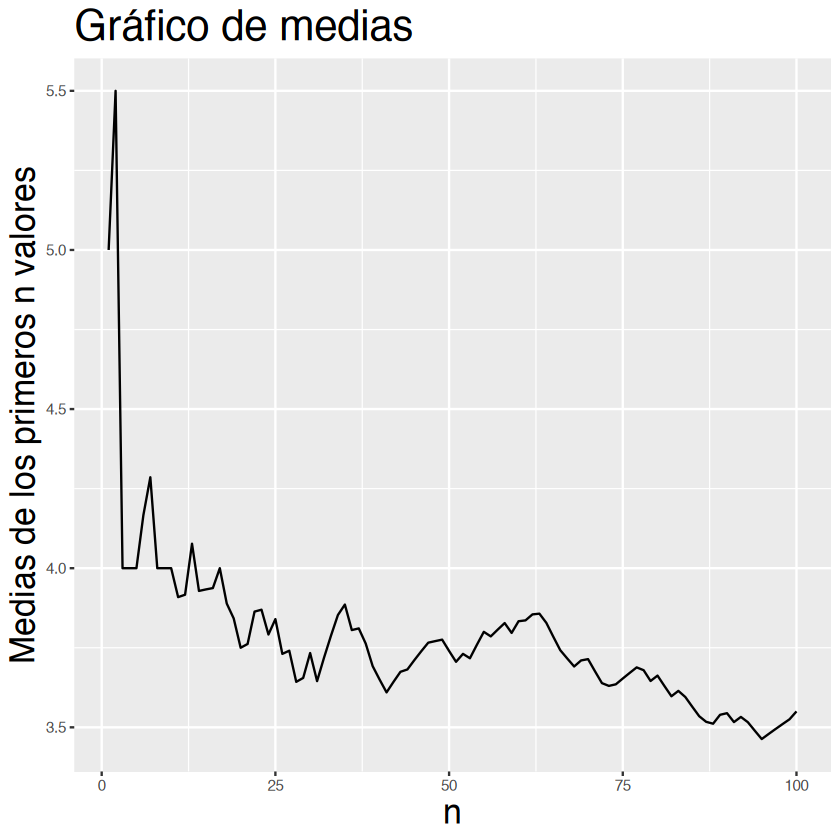

In [25]:
medias_df <- as.data.frame(medias)
medias_df$n <- 1:N
ggplot(medias_df, aes(n,medias)) +
        theme(plot.title = element_text(size = 25),
              axis.title.y=element_text(size = 20),
              axis.title.x=element_text(size = 20))+
        geom_line()+
        labs(y="Medias de los primeros n valores",
             title="Gráfico de medias")

### Qué concluimos?

### Pero ese es apenas 1 experimento! Repitámoslo más veces

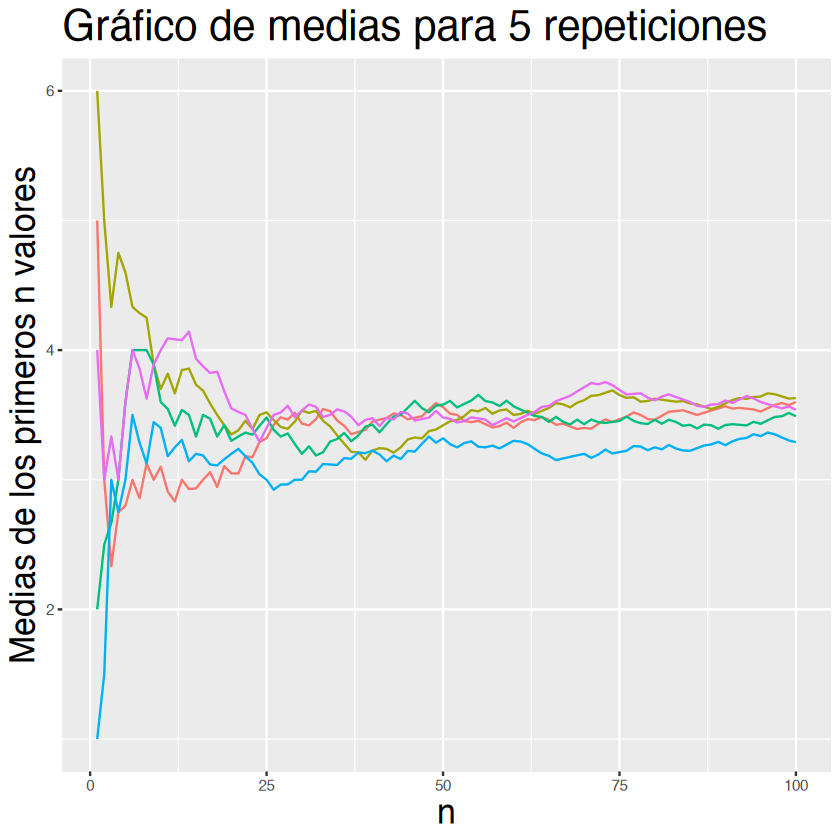

In [28]:
nrep <- 5 #2,5,50,200
{
  medias_rep <- array(rep(0,nrep*N),dim=c(N,nrep))

  for (r in 1:nrep)
  {
    u <- rdunif(N,1,6)
    medias_rep[,r] <- cumsum(u) / 1:N 
    sN[r] <- sd(u)
  }
    
    medias_df <- as.data.frame(medias_rep)
    medias_df$n <- 1:N
    plotdata <- medias_df %>% tidyr::gather("rep", "media", 1:nrep) 
    ggplot(plotdata, aes(n,media,group=rep,color=rep)) +
        geom_line(show.legend = F)+
        theme(plot.title = element_text(size = 25),
              axis.title.y=element_text(size = 20),
              axis.title.x=element_text(size = 20))+
        labs(y="Medias de los primeros n valores",
            title=paste0("Gráfico de medias para ",nrep," repeticiones"))
}
